No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Erro Médio Quadrático: 10778359960920.111


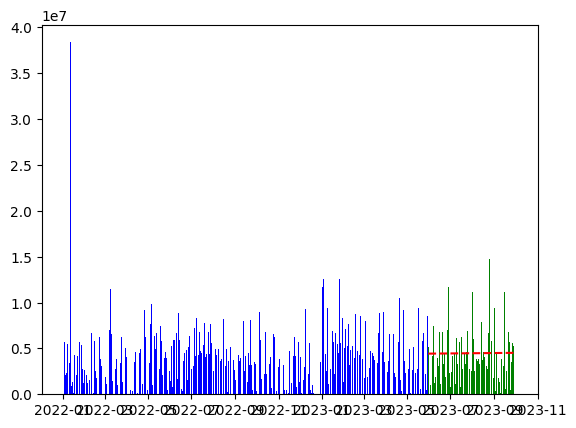

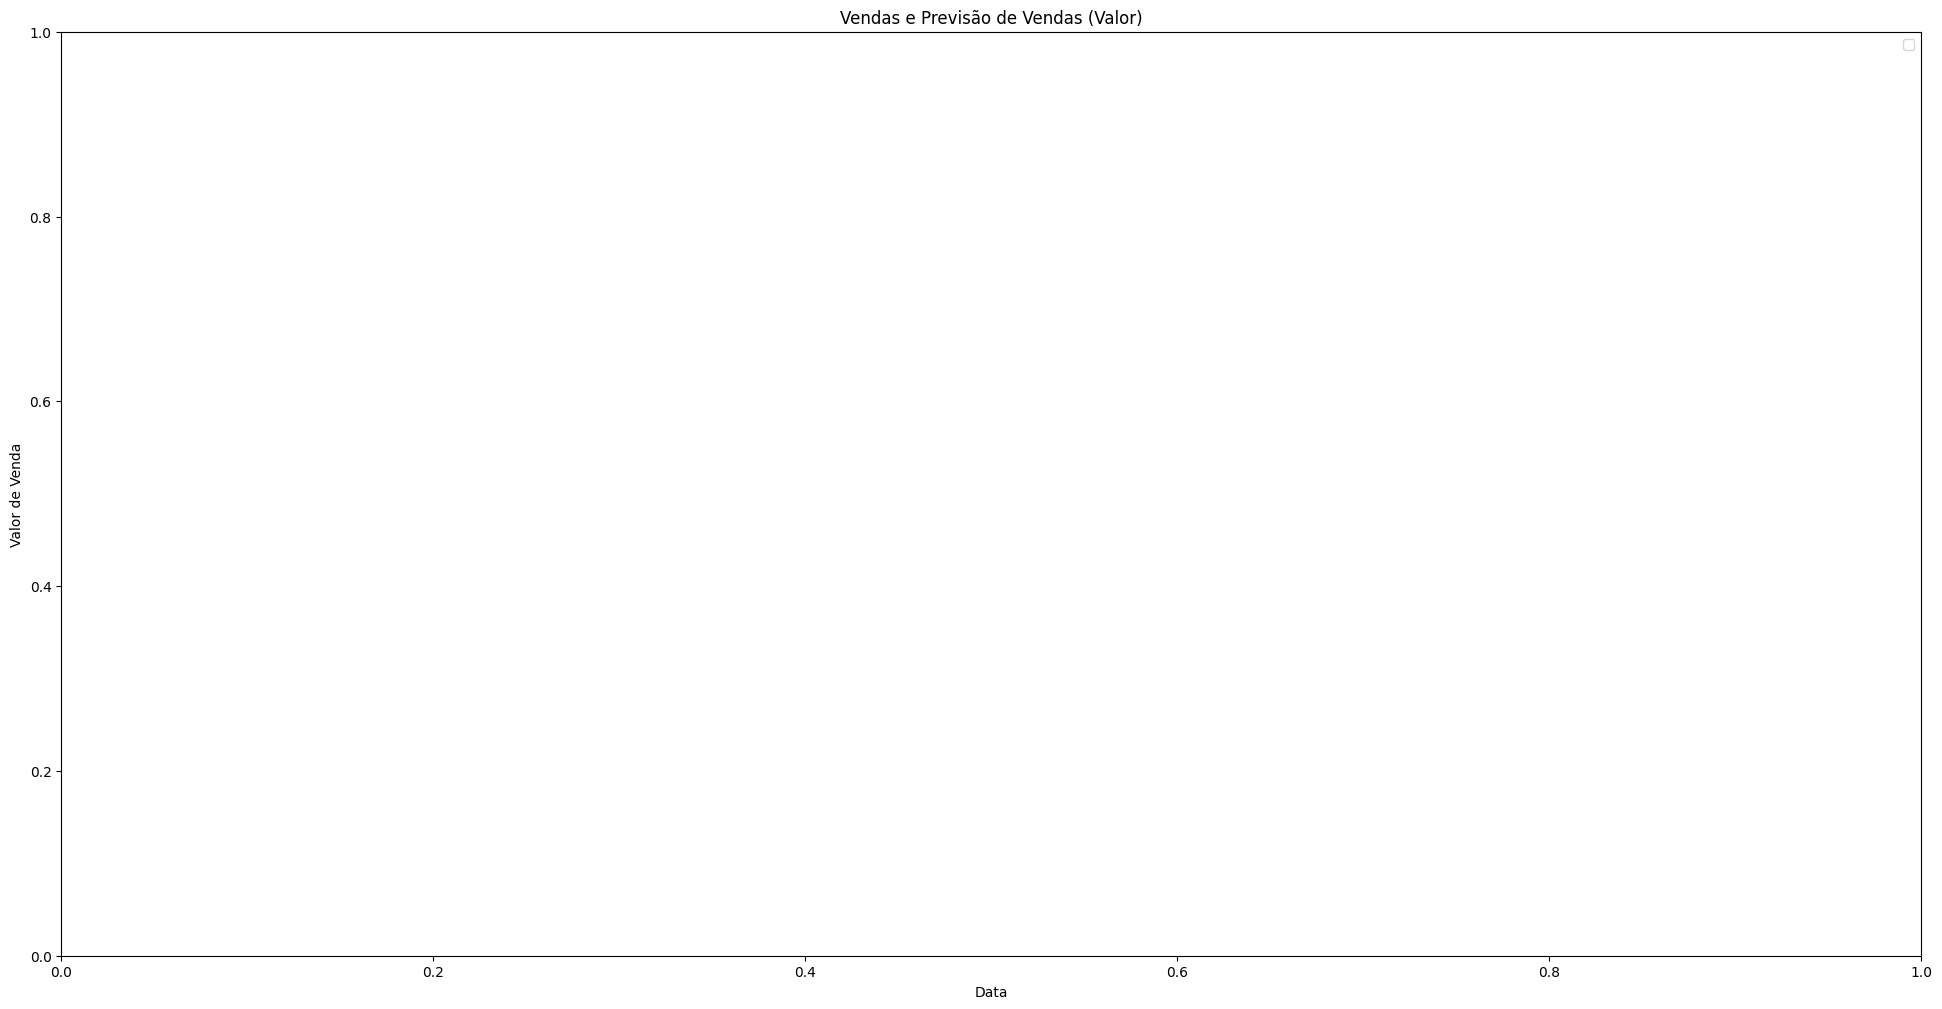

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

file_path = "D:/Projetos/TCC/Arquivos Base/Vendas/Vendas_Total.csv"

vendas = pd.read_csv(file_path, converters={'cst_cod': str})
vendas = vendas.drop(columns=['sls_tme'])
vendas['sls_day'] = pd.to_datetime(vendas['sls_day'], format='%Y%m%d')

vendas_valor = vendas.groupby('sls_day')['sls_vle'].sum()

vendas_valor = vendas_valor.reset_index()
vendas_valor['dias_desde_inicio'] = (vendas_valor['sls_day'] - vendas_valor['sls_day'].min()).dt.days

train, test = train_test_split(vendas_valor, test_size=0.2, shuffle=False)

modelo_linear = LinearRegression()
modelo_linear.fit(train[['dias_desde_inicio']], train['sls_vle'])

test['previsao_valor'] = modelo_linear.predict(test[['dias_desde_inicio']])

plt.bar(train['sls_day'], train['sls_vle'], label='Treino (Valor)', color='blue')
plt.bar(test['sls_day'], test['sls_vle'], label='Teste (Valor)', color='green')
plt.plot(test['sls_day'], test['previsao_valor'], label='Previsão de Vendas (Valor)', color='red', linestyle='dashed')
plt.title("Vendas e Previsão de Vendas (Valor)")
plt.xlabel("Data")
plt.ylabel("Valor de Venda")
plt.legend()

erro = mean_squared_error(test['sls_vle'], test['previsao_valor'])
print(f"Erro Médio Quadrático: {erro}")

plt.show()
